In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

# 'title',news_data_raw_v1.iloc[5]['_id']
# 'title',news_data_raw_v1.iloc[5]['title']
# 'description',news_data_raw_v1.iloc[5]['description']


('title', 6)

('title', 'Amazon Analysts Raise Price Targets After Stellar Q2 Results')

('description',
 'Consumers flocked to Amazon for shopping, as the coronavirus pandemic stranded them at home. And businesses increasingly used the cloud.')

In [17]:
news_data_raw_v1=pd.read_csv('news_data.csv')

#source
news_data_raw_v1.source.value_counts(dropna=False)
news_data_raw_v1.drop(['source'],axis=1,inplace=True)# 
f'drop **source** as everything is source=bing, no information gain'


bing    113
Name: source, dtype: int64

'drop **source** as everything is source=bing, no information gain'

#### theme

<AxesSubplot:title={'center':'articles per theme'}>

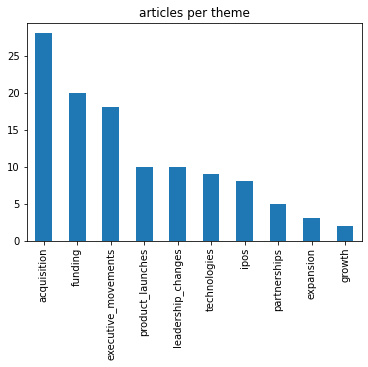

In [13]:
news_data_raw_v1.theme.value_counts(dropna=False).plot(kind='bar',title='articles per theme')

#### Insights from the plot above:
1. can basically see 3 groups from a coverage point of view for content. Not evey theme as equal coverage. This might impact the score for compaines with lower coverage

 - coverage high for ['acquisition','funding','executive_movements'],
 - coverage moderate for [product_launches,leadership_changes,technologies,ipos],
 - coverage low for others.
 
##### Assumption
    - Theme coverage is directly realted to company coverage

#### Action-
The scoring metric should be able to handle imbalaced cases


#### time

<AxesSubplot:title={'center':'different days published'}>

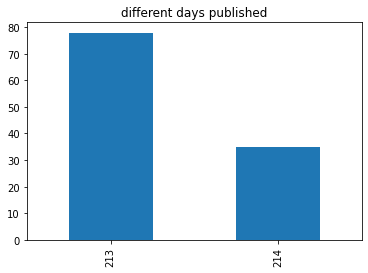

<AxesSubplot:title={'center':'different hours published'}>

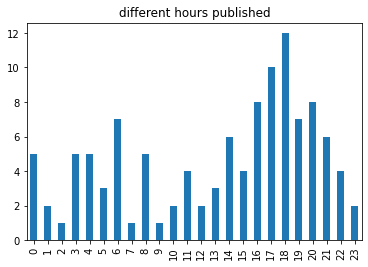

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
news_data_raw_v1.loc[:,'published_on']=pd.to_datetime(news_data_raw_v1['published_on'])
news_data_raw_v1.loc[:,'dayofyear']=news_data_raw_v1['published_on'].dt.dayofyear

news_data_raw_v1['dayofyear'].value_counts().plot(kind='bar',title='different days published')
plt.show()
#not useful

news_data_raw_v1.loc[:,'hourofday']=news_data_raw_v1['published_on'].dt.hour
news_data_raw_v1['hourofday'].value_counts().sort_index().plot(kind='bar',title='different hours published')

In [37]:
import seaborn as sns

In [46]:
#looking for variation w.r.t hour in top categories of theme
theme_hour_gp=news_data_raw_v1[~news_data_raw_v1['theme'].isin(['growth','expansion','partnerships'])].groupby(['theme','hourofday']).size().reset_index(name='count')
theme_hour_gp

,theme,hourofday,count
0,acquisition,0,1
1,acquisition,1,1
2,acquisition,4,2
3,acquisition,5,3
4,acquisition,6,2
...,...,...,...
61,technologies,17,1
62,technologies,18,2
63,technologies,19,2
64,technologies,21,1


#### time and theme

<AxesSubplot:xlabel='hourofday', ylabel='count'>

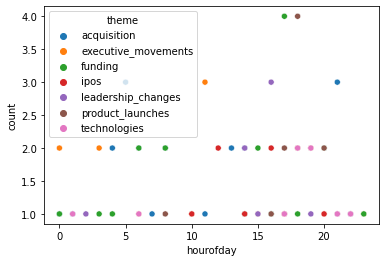

In [45]:
sns.scatterplot(x='hourofday',y='count',hue='theme',data=theme_hour_gp)

* This is good variation. This could capture some infomration w.r.t on publishihing hour preference of certain themes

Possible Insight:
* If we are low on content for some companies of specific themes and if we have theme specific crawlers, **we could trigger scraping close to publishing hour. This would reduce delay in getting the information**. 
* Also, having theme specific crawlers would make sense given the volume for each theme is different. **Scaling, and resource assignment to crawler group can be different based on the scale of content published. Reduce infra cost**

NOTE: We need to revisit this to concretize the assoication


#### description

In [47]:
news_data_raw_v1

,_id,theme,title,description,published_on,dayofyear,hourofday
0,1,funding,Chinese Tesla rival Xpeng Motors in talks over...,"Xpeng Motors, one of Tesla's rivals in China, ...",2020-07-31 15:41:00+00:00,213,15
1,2,funding,Wine.com Seeks Funding at Valuation of More Th...,"Wine.com, an online retailer that lets custome...",2020-08-01 00:02:00+00:00,214,0
2,3,funding,Fenwick-Led Telehealth Co. Raises $33M As Indu...,Fenwick-advised telehealth platform Lemonaid H...,2020-07-31 22:36:00+00:00,213,22
3,4,funding,United Community Banks (NASDAQ:UCBI) Raised to...,United Community Banks (NASDAQ:UCBI) was upgra...,2020-08-01 06:29:00+00:00,214,6
4,5,funding,"Golden West Food Group, Cooks Venture Raise $1...",PRNewswire/ -- Golden West Food Group and Cook...,2020-07-31 18:47:00+00:00,213,18
...,...,...,...,...,...,...,...
108,109,ipos,AlloVir raises $276M IPO to run broad cell the...,AlloVir has raised $276 million in an upsized ...,2020-07-31 12:25:00+00:00,213,12
109,110,ipos,Exclusive: SenseTime eyes STAR market IPO afte...,Chinese start-up SenseTime is considering an i...,2020-07-31 10:48:00+00:00,213,10
110,111,ipos,Vital Farms shares soar 63% in trading debut a...,Shares of ethical food company Vital Farms Inc...,2020-07-31 16:45:00+00:00,213,16
111,112,ipos,Conscious agribusiness Vital Farms goes public,"You can find their eggs in Whole Foods, Walmar...",2020-07-31 20:26:00+00:00,213,20


/Users/ronak/anaconda3/envs/customer/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'title_len')

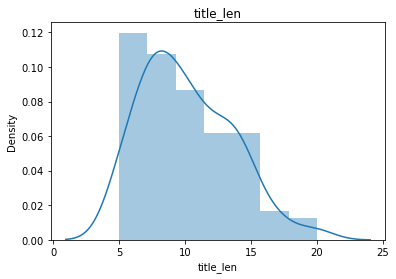

In [53]:
news_data_raw_v1.loc[:,'title_len']=news_data_raw_v1['title'].apply(lambda x: len(x.split()))
sns.distplot(news_data_raw_v1['title_len']).set_title('title_len')

#title has a min_word length and a max word_length

/Users/ronak/anaconda3/envs/customer/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'description_len')

count    113.000000
mean      31.725664
std       11.977097
min       15.000000
25%       23.000000
50%       31.000000
75%       38.000000
max      112.000000
Name: description_len, dtype: float64

,_id,theme,title,description,published_on,dayofyear,hourofday,title_len,description_len
0,1,funding,Chinese Tesla rival Xpeng Motors in talks over...,"Xpeng Motors, one of Tesla's rivals in China, ...",2020-07-31 15:41:00+00:00,213,15,18,36
1,2,funding,Wine.com Seeks Funding at Valuation of More Th...,"Wine.com, an online retailer that lets custome...",2020-08-01 00:02:00+00:00,214,0,10,40
2,3,funding,Fenwick-Led Telehealth Co. Raises $33M As Indu...,Fenwick-advised telehealth platform Lemonaid H...,2020-07-31 22:36:00+00:00,213,22,8,34
3,4,funding,United Community Banks (NASDAQ:UCBI) Raised to...,United Community Banks (NASDAQ:UCBI) was upgra...,2020-08-01 06:29:00+00:00,214,6,9,40
4,5,funding,"Golden West Food Group, Cooks Venture Raise $1...",PRNewswire/ -- Golden West Food Group and Cook...,2020-07-31 18:47:00+00:00,213,18,13,23
...,...,...,...,...,...,...,...,...,...
108,109,ipos,AlloVir raises $276M IPO to run broad cell the...,AlloVir has raised $276 million in an upsized ...,2020-07-31 12:25:00+00:00,213,12,10,42
109,110,ipos,Exclusive: SenseTime eyes STAR market IPO afte...,Chinese start-up SenseTime is considering an i...,2020-07-31 10:48:00+00:00,213,10,12,35
110,111,ipos,Vital Farms shares soar 63% in trading debut a...,Shares of ethical food company Vital Farms Inc...,2020-07-31 16:45:00+00:00,213,16,14,24
111,112,ipos,Conscious agribusiness Vital Farms goes public,"You can find their eggs in Whole Foods, Walmar...",2020-07-31 20:26:00+00:00,213,20,6,23


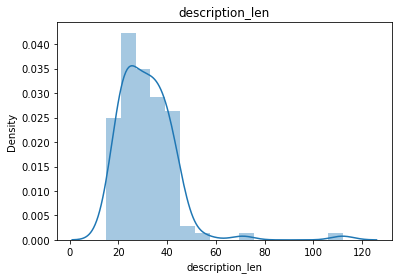

In [60]:
news_data_raw_v1.loc[:,'description_len']=news_data_raw_v1['description'].apply(lambda x: len(x.split()))
sns.distplot(news_data_raw_v1['description_len']).set_title('description_len')
news_data_raw_v1['description_len'].describe()
news_data_raw_v1
#description has min_word length
# typical description is around 25-40 words